домашняя работа 7.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Задание 1.

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
Y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = 10

Считаем с использованием intercept

In [3]:
b = (np.mean(X * Y) - np.mean(X) * np.mean(Y)) / (np.mean(X**2) - np.mean(X) ** 2)
b

2.620538882402765

In [4]:
a = np.mean(Y) - b * np.mean(X)
a

444.1773573243596

In [5]:
Y_hat = a + b * X
Y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

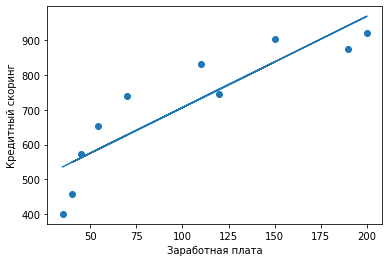

In [6]:
plt.scatter(X, Y)
plt.plot(X, Y_hat)
plt.xlabel('Заработная плата')
plt.ylabel('Кредитный скоринг')
plt.show()

Считаем без использования intercept

In [7]:
X = X.reshape(n,1)
Y = Y.reshape(n,1)

In [8]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T@Y)
B

array([[5.88982042]])

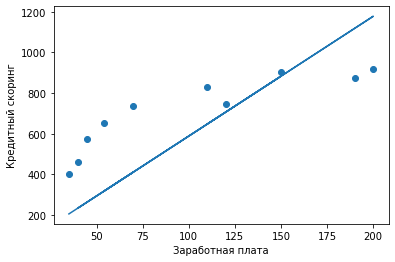

In [9]:
plt.scatter(X, Y)
plt.plot(X, B*X)
plt.xlabel('Заработная плата')
plt.ylabel('Кредитный скоринг')
plt.show()

Задание 2.

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [10]:
def mse_(B1, Y=Y, X=X, n=10):
    return ((B1*X - Y)**2).sum() / n

In [11]:
B1 = 0.1

In [12]:
alpha = 1e-6

In [13]:
for i in range(801):
    B1 -= alpha*(2/n)*np.sum((B1*X-Y)*X)
    if i%400 == 0:
        print('Iteration = {i}\nB1 = {B1}\nmse = {mse}\n'.format(i=i, B1=B1, mse=mse_(B1)))

Iteration = 0
B1 = 0.25952808
mse = 493237.7212546963

Iteration = 400
B1 = 5.8897415574471985
mse = 56516.85850140053

Iteration = 800
B1 = 5.88982041902807
mse = 56516.8584157194

